In [1]:
# Step 1: import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2: read file
df = pd.read_excel("C:/Users/Raafat/Documents/data analysis depi/FINAL_PROJECT.xlsx", sheet_name=None)


In [3]:
# Step 3: Explore available sheets and their data
# Display sheet names
print(df.keys())


dict_keys(['SatisfiedLevel', 'RatingLevel', 'PerformanceRating', 'Employee', 'EducationLevel'])


In [4]:
# Preview the first 5 rows
print(df['SatisfiedLevel'].head())
print(df['RatingLevel'].head())
print(df['PerformanceRating'].head())
print(df['Employee'].head())
print(df['EducationLevel'].head())

   SatisfactionID  SatisfactionLevel
0               1  Very Dissatisfied
1               2       Dissatisfied
2               3            Neutral
3               4         Satisfied 
4               5     Very Satisfied
   RatingID           RatingLevel
0         1          Unacceptable
1         2     Needs Improvement
2         3     Meets Expectation
3         4  Exceeds Expectation 
4         5      Above and Beyond
  PerformanceID EmployeeID ReviewDate  EnvironmentSatisfaction  \
0          PR01  79F7-78EC 2013-01-02                        5   
1          PR02  B61E-0F26 2013-01-03                        5   
2          PR03  F5E3-48BB 2013-01-03                        3   
3          PR04  0678-748A 2013-01-04                        5   
4          PR05  541F-3E19 2013-01-04                        5   

   JobSatisfaction  RelationshipSatisfaction  TrainingOpportunitiesWithinYear  \
0                4                         5                                1   
1              

In [5]:
# Merge Job Satisfaction
m1 = df['PerformanceRating'].merge(
    df['SatisfiedLevel'],
    left_on="JobSatisfaction",
    right_on="SatisfactionID",
    how="inner"
).rename(columns={"SatisfactionLevel": "JobSatisfactionLevel"}).drop("SatisfactionID", axis=1)

# Merge Environment Satisfaction
m2 = m1.merge(
    df['SatisfiedLevel'],
    left_on="EnvironmentSatisfaction",
    right_on="SatisfactionID",
    how="left"
).rename(columns={"SatisfactionLevel": "EnvironmentSatisfactionLevel"}).drop("SatisfactionID", axis=1)

# Merge Relationship Satisfaction
m3 = m2.merge(
    df['SatisfiedLevel'],
    left_on="RelationshipSatisfaction",
    right_on="SatisfactionID",
    how="left"
).rename(columns={"SatisfactionLevel": "RelationshipSatisfactionLevel"}).drop("SatisfactionID", axis=1)

# Merge WorkLifeBalance Satisfaction
merged1 = m3.merge(
    df['SatisfiedLevel'],
    left_on="WorkLifeBalance",
    right_on="SatisfactionID",
    how="left"
).rename(columns={"SatisfactionLevel": "WorkLifeBalanceSatisfaction"}).drop("SatisfactionID", axis=1)


In [6]:
merged1.head()

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating,JobSatisfactionLevel,EnvironmentSatisfactionLevel,RelationshipSatisfactionLevel,WorkLifeBalanceSatisfaction
0,PR01,79F7-78EC,2013-01-02,5,4,5,1,0,4,4,4,Satisfied,Very Satisfied,Very Satisfied,Satisfied
1,PR02,B61E-0F26,2013-01-03,5,4,4,1,3,4,4,3,Satisfied,Very Satisfied,Satisfied,Satisfied
2,PR03,F5E3-48BB,2013-01-03,3,4,5,3,2,3,5,4,Satisfied,Neutral,Very Satisfied,Neutral
3,PR04,0678-748A,2013-01-04,5,3,2,2,0,2,3,2,Neutral,Very Satisfied,Dissatisfied,Dissatisfied
4,PR05,541F-3E19,2013-01-04,5,2,3,1,0,4,4,3,Dissatisfied,Very Satisfied,Neutral,Satisfied


In [7]:
# merge PerformanceRating & SatisfiedLevel & RatingLevel
df_performance = merged1.merge(df['RatingLevel'],
    left_on='ManagerRating',
    right_on='RatingID',
    how='inner')

In [8]:
df_performance.head()

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating,JobSatisfactionLevel,EnvironmentSatisfactionLevel,RelationshipSatisfactionLevel,WorkLifeBalanceSatisfaction,RatingID,RatingLevel
0,PR01,79F7-78EC,2013-01-02,5,4,5,1,0,4,4,4,Satisfied,Very Satisfied,Very Satisfied,Satisfied,4,Exceeds Expectation
1,PR02,B61E-0F26,2013-01-03,5,4,4,1,3,4,4,3,Satisfied,Very Satisfied,Satisfied,Satisfied,3,Meets Expectation
2,PR03,F5E3-48BB,2013-01-03,3,4,5,3,2,3,5,4,Satisfied,Neutral,Very Satisfied,Neutral,4,Exceeds Expectation
3,PR04,0678-748A,2013-01-04,5,3,2,2,0,2,3,2,Neutral,Very Satisfied,Dissatisfied,Dissatisfied,2,Needs Improvement
4,PR05,541F-3E19,2013-01-04,5,2,3,1,0,4,4,3,Dissatisfied,Very Satisfied,Neutral,Satisfied,3,Meets Expectation


In [9]:
df_performance.shape

(6709, 17)

In [10]:
# merge Employee & EducationLevel
df_Employee =df['Employee'].merge(df['EducationLevel'],
    left_on="Education", 
    right_on="EducationLevelID",
    how="inner")

In [11]:
df_Employee.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationLevelID,EducationLevel
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,1,No,2012-01-03,No,10,4,9,7,5,Doctorate
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,0,Yes,2012-01-04,No,10,6,10,0,4,Masters
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,1,No,2012-01-04,No,10,6,10,8,4,Masters
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,0,No,2012-01-05,No,10,10,10,0,3,Bachelors
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,0,No,2012-01-05,Yes,6,1,1,6,2,High School


In [12]:
df_Employee.shape

(1470, 25)

In [13]:
# merge all sheets
df= df_performance.merge(df_Employee,
    on="EmployeeID", 
    how="outer")

In [14]:
df[['PerformanceID','EmployeeID','EducationLevelID']].head()

,PerformanceID,EmployeeID,EducationLevelID
0,NaN,001A-8F88,4
1,PR4067,005C-E0FB,4
2,PR5070,005C-E0FB,4
3,PR6165,005C-E0FB,4
4,PR1165,00A3-2445,2


In [15]:
df_performance = df_performance.drop(['RatingID'], axis=1)
df_performance.head()

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating,JobSatisfactionLevel,EnvironmentSatisfactionLevel,RelationshipSatisfactionLevel,WorkLifeBalanceSatisfaction,RatingLevel
0,PR01,79F7-78EC,2013-01-02,5,4,5,1,0,4,4,4,Satisfied,Very Satisfied,Very Satisfied,Satisfied,Exceeds Expectation
1,PR02,B61E-0F26,2013-01-03,5,4,4,1,3,4,4,3,Satisfied,Very Satisfied,Satisfied,Satisfied,Meets Expectation
2,PR03,F5E3-48BB,2013-01-03,3,4,5,3,2,3,5,4,Satisfied,Neutral,Very Satisfied,Neutral,Exceeds Expectation
3,PR04,0678-748A,2013-01-04,5,3,2,2,0,2,3,2,Neutral,Very Satisfied,Dissatisfied,Dissatisfied,Needs Improvement
4,PR05,541F-3E19,2013-01-04,5,2,3,1,0,4,4,3,Dissatisfied,Very Satisfied,Neutral,Satisfied,Meets Expectation


In [16]:
df_Employee= df_Employee.drop(['Education'],axis=1)
df_Employee.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationLevelID,EducationLevel
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,1,No,2012-01-03,No,10,4,9,7,5,Doctorate
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,0,Yes,2012-01-04,No,10,6,10,0,4,Masters
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,1,No,2012-01-04,No,10,6,10,8,4,Masters
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,0,No,2012-01-05,No,10,10,10,0,3,Bachelors
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,0,No,2012-01-05,Yes,6,1,1,6,2,High School


In [17]:
print(df_Employee.shape)
print(df_performance.shape)

(1470, 24)
(6709, 16)


In [18]:
have_perf = df_Employee['EmployeeID'].isin(df_performance['EmployeeID']).sum()
no_perf = (~df_Employee['EmployeeID'].isin(df_performance['EmployeeID'])).sum()

print("Employees with performance:", have_perf)
print("Employees without performance:", no_perf)


Employees with performance: 1280
Employees without performance: 190


In [19]:
string_cols = df_Employee.select_dtypes(include='object').columns
# trim 
df_Employee[string_cols] = df_Employee[string_cols].apply(lambda col: col.str.strip())

In [20]:
string_cols = df_performance.select_dtypes(include='object').columns
# trim 
df_performance[string_cols] = df_performance[string_cols].apply(lambda col: col.str.strip())

In [21]:
from dateutil.relativedelta import relativedelta

# نفترض أن عندك جدول الموظفين اسمه employee
# وفيه الأعمدة: EmployeeID, HireDate, YearsAtCompany

# نتأكد إن HireDate من نوع تاريخ
df_Employee['HireDate'] = pd.to_datetime(df_Employee['HireDate'])

# نحسب EndDate بإضافة عدد السنوات إلى تاريخ التعيين
df_Employee['CurrentDate'] = df_Employee.apply(
    lambda row: row['HireDate'] + relativedelta(years=row['YearsAtCompany']),
    axis=1
)

# نعرض أول النتائج للتأكد
print(df_Employee[['EmployeeID', 'HireDate', 'YearsAtCompany', 'CurrentDate']].head())


  EmployeeID   HireDate  YearsAtCompany CurrentDate
0  3012-1A41 2012-01-03              10  2022-01-03
1  CBCB-9C9D 2012-01-04              10  2022-01-04
2  95D7-1CE9 2012-01-04              10  2022-01-04
3  47A0-559B 2012-01-05              10  2022-01-05
4  42CC-040A 2012-01-05               6  2018-01-05


In [22]:
# Map the corresponding employee dates to the performance dataframe
df_performance["HireDate"] = df_performance["EmployeeID"].map(df_Employee.set_index("EmployeeID")["HireDate"])
df_performance["CurrentDate"] = df_performance["EmployeeID"].map(df_Employee.set_index("EmployeeID")["CurrentDate"])
df_performance["Attrition"] = df_performance["EmployeeID"].map(df_Employee.set_index("EmployeeID")["Attrition"])

# Now you can compare directly
df_performance["ReviewCheck"] = df_performance.apply(
    lambda row: (
        "Invalid - Before Hire"
        if row["ReviewDate"] < row["HireDate"]
        else "Invalid - After Exit"
        if row["Attrition"] == "Yes" and row["ReviewDate"] > row["CurrentDate"]
        else "Valid"
    ),
    axis=1
)


In [23]:
valid_count = (df_performance['ReviewCheck'] == 'Valid').sum()
invalid_before = (df_performance['ReviewCheck'] == 'Invalid - Before Hire').sum()
invalid_after = (df_performance['ReviewCheck'] == 'Invalid - After Exit').sum()

print("Valid reviews:", valid_count)
print("Invalid - Before Hire:", invalid_before)
print("Invalid - After Exit:", invalid_after)


Valid reviews: 4891
Invalid - Before Hire: 1141
Invalid - After Exit: 677


In [24]:
# ✅ Count distinct EmployeeIDs by review status

valid_count = df_performance.loc[df_performance['ReviewCheck'] == 'Valid', 'EmployeeID'].nunique()
invalid_before = df_performance.loc[df_performance['ReviewCheck'] == 'Invalid - Before Hire', 'EmployeeID'].nunique()
invalid_after = df_performance.loc[df_performance['ReviewCheck'] == 'Invalid - After Exit', 'EmployeeID'].nunique()

print("Distinct employees with Valid reviews:", valid_count)
print("Distinct employees with Invalid - Before Hire reviews:", invalid_before)
print("Distinct employees with Invalid - After Exit reviews:", invalid_after)


Distinct employees with Valid reviews: 1169
Distinct employees with Invalid - Before Hire reviews: 289
Distinct employees with Invalid - After Exit reviews: 207


In [25]:
df_performance[['EmployeeID' ,'Attrition','HireDate','CurrentDate','ReviewCheck']]

,EmployeeID,Attrition,HireDate,CurrentDate,ReviewCheck
0,79F7-78EC,Yes,2013-12-14,2018-12-14,Invalid - Before Hire
1,B61E-0F26,Yes,2014-11-07,2021-11-07,Invalid - Before Hire
2,F5E3-48BB,Yes,2015-01-13,2018-01-13,Invalid - Before Hire
3,0678-748A,Yes,2015-05-11,2021-05-11,Invalid - Before Hire
4,541F-3E19,Yes,2014-04-02,2015-04-02,Invalid - Before Hire
...,...,...,...,...,...
6704,4F28-CFAF,Yes,2018-09-13,2021-09-13,Invalid - Before Hire
6705,7C80-94E0,No,2013-01-01,2022-01-01,Valid
6706,8233-2483,No,2012-03-12,2022-03-12,Valid
6707,8A5B-3D6E,No,2016-01-14,2022-01-14,Valid


In [26]:
# Make sure you're working on a copy (to avoid warnings)
df_performance = df_performance.copy()

# Keep only rows where ReviewCheck == 'Valid'
df_performance = df_performance[df_performance["ReviewCheck"] == "Valid"]

# Reset the index for cleanliness (optional)
df_performance.reset_index(drop=True,inplace=True)


In [27]:
valid_count = (df_performance['ReviewCheck'] == 'Valid').sum()
invalid_before = (df_performance['ReviewCheck'] == 'Invalid - Before Hire').sum()
invalid_after = (df_performance['ReviewCheck'] == 'Invalid - After Exit').sum()

print("Valid reviews:", valid_count)
print("Invalid - Before Hire:", invalid_before)
print("Invalid - After Exit:", invalid_after)

Valid reviews: 4891
Invalid - Before Hire: 0
Invalid - After Exit: 0


In [28]:
df_performance[['EmployeeID' ,'Attrition','HireDate','CurrentDate','ReviewCheck']]

,EmployeeID,Attrition,HireDate,CurrentDate,ReviewCheck
0,9E7A-1F70,Yes,2012-05-02,2017-05-02,Valid
1,528C-3E0D,Yes,2013-10-15,2019-10-15,Valid
2,D077-169C,No,2012-03-06,2022-03-06,Valid
3,88B8-EB84,No,2012-03-24,2022-03-24,Valid
4,9C57-828C,No,2013-07-11,2022-07-11,Valid
...,...,...,...,...,...
4886,56A5-271B,No,2013-10-10,2022-10-10,Valid
4887,B3FE-D332,No,2013-03-15,2022-03-15,Valid
4888,7C80-94E0,No,2013-01-01,2022-01-01,Valid
4889,8233-2483,No,2012-03-12,2022-03-12,Valid


In [29]:
have_perf = df_Employee['EmployeeID'].isin(df_performance['EmployeeID']).sum()
no_perf = (~df_Employee['EmployeeID'].isin(df_performance['EmployeeID'])).sum()
have_perf
no_perf

np.int64(301)

In [30]:
#check
invalid_records = df_Employee[
    (df_Employee["YearsAtCompany"] < 0) |
    (df_Employee["YearsInMostRecentRole"] < 0) |
    (df_Employee["YearsSinceLastPromotion"] < 0) |
    (df_Employee["YearsWithCurrManager"] < 0)
]

if invalid_records.empty:
    print("No negative values found in tenure-related columns.")
else:
    print("Found records with negative values:")
    print(invalid_records)

No negative values found in tenure-related columns.


In [31]:
# Print dataset shape after merging
df_Employee.shape

(1470, 25)

In [32]:
df_performance.shape

(4891, 20)

In [33]:
# Step 5: Cleaning 
# Check for missing values
print(df_Employee.isnull().sum().sum())
print(df_performance.isnull().sum().sum())

0
0


In [34]:
# Check for duplicate rows
print(df_Employee.duplicated().sum())
print(df_performance.duplicated().sum())

0
0


In [35]:
# Show summary statistics for numerical columns
df_Employee.describe()

,Age,DistanceFromHome (KM),Salary,StockOptionLevel,HireDate,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationLevelID,CurrentDate
count,1470.000000,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470
mean,28.989796,22.502721,112956.497959,0.793878,2017-07-05 14:50:26.938775296,4.562585,2.293197,3.440816,2.239456,2.912925,2022-01-27 00:57:47.755102208
min,18.000000,1.000000,20387.000000,0.000000,2012-01-03 00:00:00,0.000000,0.000000,0.000000,0.000000,1.000000,2013-04-23 00:00:00
25%,23.000000,12.000000,43580.500000,0.000000,2014-07-10 06:00:00,2.000000,0.000000,1.000000,0.000000,2.000000,2022-02-17 06:00:00
50%,26.000000,22.000000,71199.500000,1.000000,2017-09-02 00:00:00,4.000000,1.000000,3.000000,1.000000,3.000000,2022-05-20 00:00:00
75%,34.000000,33.000000,142055.750000,1.000000,2020-05-14 18:00:00,7.000000,4.000000,6.000000,4.000000,4.000000,2022-09-04 00:00:00
max,51.000000,45.000000,547204.000000,3.000000,2022-12-31 00:00:00,10.000000,10.000000,10.000000,10.000000,5.000000,2022-12-31 00:00:00
std,7.993055,12.811124,103342.889222,0.852077,NaN,3.288048,2.539093,2.945194,2.505774,1.024165,NaN


In [36]:
df_performance.describe()

,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating,HireDate,CurrentDate
count,4891,4891.000000,4891.000000,4891.000000,4891.000000,4891.000000,4891.000000,4891.000000,4891.000000,4891,4891
mean,2019-10-08 14:20:52.749948672,3.863832,3.424658,3.420159,2.019423,1.015743,3.417093,3.984870,3.479861,2015-01-03 03:40:31.159272192,2022-03-03 19:18:14.500102400
min,2013-01-08 00:00:00,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,2.000000,2012-01-03 00:00:00,2013-04-23 00:00:00
25%,2018-03-12 12:00:00,3.000000,2.000000,2.000000,1.000000,0.000000,2.000000,3.000000,3.000000,2013-02-27 00:00:00,2022-02-17 00:00:00
50%,2020-03-01 00:00:00,4.000000,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,3.000000,2014-06-27 00:00:00,2022-05-03 00:00:00
75%,2021-08-13 12:00:00,5.000000,4.000000,4.000000,3.000000,2.000000,4.000000,5.000000,4.000000,2016-08-16 00:00:00,2022-08-13 00:00:00
max,2022-12-31 00:00:00,5.000000,5.000000,5.000000,3.000000,3.000000,5.000000,5.000000,5.000000,2021-07-19 00:00:00,2022-12-31 00:00:00
std,NaN,0.942879,1.159383,1.158376,0.821136,0.953927,1.146269,0.814852,0.955531,NaN,NaN


In [37]:
# Show data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6899 entries, 0 to 6898
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   PerformanceID                    6709 non-null   object        
 1   EmployeeID                       6899 non-null   object        
 2   ReviewDate                       6709 non-null   datetime64[ns]
 3   EnvironmentSatisfaction          6709 non-null   float64       
 4   JobSatisfaction                  6709 non-null   float64       
 5   RelationshipSatisfaction         6709 non-null   float64       
 6   TrainingOpportunitiesWithinYear  6709 non-null   float64       
 7   TrainingOpportunitiesTaken       6709 non-null   float64       
 8   WorkLifeBalance                  6709 non-null   float64       
 9   SelfRating                       6709 non-null   float64       
 10  ManagerRating                    6709 non-null   float64    

In [38]:
# Convert all object-type columns to string type
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns})

In [39]:
# Convert all object-type columns to string type
df_Employee = df_Employee.astype({col: 'string' for col in df_Employee.select_dtypes(include='object').columns})

In [40]:
print(df_Employee.dtypes)

EmployeeID                 string[python]
FirstName                  string[python]
LastName                   string[python]
Gender                     string[python]
Age                                 int64
BusinessTravel             string[python]
Department                 string[python]
DistanceFromHome (KM)               int64
State                      string[python]
Ethnicity                  string[python]
EducationField             string[python]
JobRole                    string[python]
MaritalStatus              string[python]
Salary                              int64
StockOptionLevel                    int64
OverTime                   string[python]
HireDate                   datetime64[ns]
Attrition                  string[python]
YearsAtCompany                      int64
YearsInMostRecentRole               int64
YearsSinceLastPromotion             int64
YearsWithCurrManager                int64
EducationLevelID                    int64
EducationLevel             string[

In [41]:
# Create a new column for full name
df_Employee['FullName']=df_Employee['FirstName']+' ' +df_Employee['LastName']
df_Employee.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationLevelID,EducationLevel,CurrentDate,FullName
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,2012-01-03,No,10,4,9,7,5,Doctorate,2022-01-03,Leonelle Simco
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,2012-01-04,No,10,6,10,0,4,Masters,2022-01-04,Leonerd Aland
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,2012-01-04,No,10,6,10,8,4,Masters,2022-01-04,Ahmed Sykes
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,2012-01-05,No,10,10,10,0,3,Bachelors,2022-01-05,Ermentrude Berrie
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,2012-01-05,Yes,6,1,1,6,2,High School,2018-01-05,Stace Savege


In [42]:
df_Employee = df_Employee.drop(['FirstName','LastName'], axis=1)
df_Employee.head()

,EmployeeID,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,EducationField,JobRole,...,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationLevelID,EducationLevel,CurrentDate,FullName
0,3012-1A41,Female,30,Some Travel,Sales,27,IL,White,Marketing,Sales Executive,...,2012-01-03,No,10,4,9,7,5,Doctorate,2022-01-03,Leonelle Simco
1,CBCB-9C9D,Male,38,Some Travel,Sales,23,CA,White,Marketing,Sales Executive,...,2012-01-04,No,10,6,10,0,4,Masters,2022-01-04,Leonerd Aland
2,95D7-1CE9,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,Marketing,HR Business Partner,...,2012-01-04,No,10,6,10,8,4,Masters,2022-01-04,Ahmed Sykes
3,47A0-559B,Non-Binary,39,Some Travel,Technology,12,IL,White,Computer Science,Engineering Manager,...,2012-01-05,No,10,10,10,0,3,Bachelors,2022-01-05,Ermentrude Berrie
4,42CC-040A,Female,29,Some Travel,Human Resources,29,CA,White,Technical Degree,Recruiter,...,2012-01-05,Yes,6,1,1,6,2,High School,2018-01-05,Stace Savege


In [43]:
#check to age
invalid_ages = df_Employee[df_Employee["Age"] < 18]

if invalid_ages.empty:
    print("No employees with age less than 18.")
else:
    print("Found employees with age less than 18:")
    print(invalid_ages)

No employees with age less than 18.


In [44]:
#add ageGoup column
bins = bins = [17, 29, 39, 49, np.inf]
labels = ["18-29", "30-39", "40-49","50+"]

df_Employee["AgeGroup"] = pd.cut(df_Employee["Age"], bins=bins, labels=labels, right=True)

df_Employee[["Age", "AgeGroup"]].head(20)

,Age,AgeGroup
0,30,30-39
1,38,30-39
2,43,40-49
3,39,30-39
4,29,18-29
5,34,30-39
6,42,40-49
7,40,40-49
8,38,30-39
9,31,30-39


In [45]:
#add tenureCompany column
tenure_bins = [0, 2, 5, 10, np.inf]
tenure_labels = ["0-2", "3-5", "6-10", "10+"]

df_Employee["TenureCompany"] = pd.cut(
    df_Employee["YearsAtCompany"],
    bins=tenure_bins,
    labels=tenure_labels,
    right=True
)

df_Employee[["YearsAtCompany", "TenureCompany"]].head(20)

,YearsAtCompany,TenureCompany
0,10,6-10
1,10,6-10
2,10,6-10
3,10,6-10
4,6,6-10
5,10,6-10
6,10,6-10
7,10,6-10
8,10,6-10
9,6,6-10


In [46]:
#salary level to jobRole
def label_salary(group):
    q33 = group["Salary"].quantile(0.33)
    q66 = group["Salary"].quantile(0.66)

    return group["Salary"].apply(
        lambda x: "Low" if x <= q33 else ("Medium" if x <= q66 else "High")
    )

df_Employee["SalaryLevel"] = df_Employee.groupby("JobRole", group_keys=False).apply(label_salary)
df_Employee.head()

C:\Users\Raafat\AppData\Local\Temp\ipykernel_19988\2346597868.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_Employee["SalaryLevel"] = df_Employee.groupby("JobRole", group_keys=False).apply(label_salary)


,EmployeeID,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,EducationField,JobRole,...,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationLevelID,EducationLevel,CurrentDate,FullName,AgeGroup,TenureCompany,SalaryLevel
0,3012-1A41,Female,30,Some Travel,Sales,27,IL,White,Marketing,Sales Executive,...,4,9,7,5,Doctorate,2022-01-03,Leonelle Simco,30-39,6-10,Medium
1,CBCB-9C9D,Male,38,Some Travel,Sales,23,CA,White,Marketing,Sales Executive,...,6,10,0,4,Masters,2022-01-04,Leonerd Aland,30-39,6-10,High
2,95D7-1CE9,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,Marketing,HR Business Partner,...,6,10,8,4,Masters,2022-01-04,Ahmed Sykes,40-49,6-10,Medium
3,47A0-559B,Non-Binary,39,Some Travel,Technology,12,IL,White,Computer Science,Engineering Manager,...,10,10,0,3,Bachelors,2022-01-05,Ermentrude Berrie,30-39,6-10,Medium
4,42CC-040A,Female,29,Some Travel,Human Resources,29,CA,White,Technical Degree,Recruiter,...,1,1,6,2,High School,2018-01-05,Stace Savege,18-29,6-10,High


In [47]:
#add traningRatio column
df_performance["TrainingRatio"] = (
    df_performance["TrainingOpportunitiesTaken"] / df_performance["TrainingOpportunitiesWithinYear"].replace(0, 1)
).round(2)

print(df_performance[["TrainingOpportunitiesWithinYear", "TrainingOpportunitiesTaken", "TrainingRatio"]].head(20))

    TrainingOpportunitiesWithinYear  TrainingOpportunitiesTaken  TrainingRatio
0                                 2                           1           0.50
1                                 2                           2           1.00
2                                 2                           2           1.00
3                                 3                           1           0.33
4                                 1                           1           1.00
5                                 3                           2           0.67
6                                 2                           0           0.00
7                                 1                           0           0.00
8                                 3                           0           0.00
9                                 3                           0           0.00
10                                2                           1           0.50
11                                1                 

In [48]:
print(df_Employee.dtypes)

EmployeeID                 string[python]
Gender                     string[python]
Age                                 int64
BusinessTravel             string[python]
Department                 string[python]
DistanceFromHome (KM)               int64
State                      string[python]
Ethnicity                  string[python]
EducationField             string[python]
JobRole                    string[python]
MaritalStatus              string[python]
Salary                              int64
StockOptionLevel                    int64
OverTime                   string[python]
HireDate                   datetime64[ns]
Attrition                  string[python]
YearsAtCompany                      int64
YearsInMostRecentRole               int64
YearsSinceLastPromotion             int64
YearsWithCurrManager                int64
EducationLevelID                    int64
EducationLevel             string[python]
CurrentDate                datetime64[ns]
FullName                   string[

In [49]:
# Convert all object-type columns to string type
df_performance = df_performance.astype({col: 'string' for col in df_performance.select_dtypes(include='object').columns})

In [50]:
print(df_performance.dtypes)

PerformanceID                      string[python]
EmployeeID                         string[python]
ReviewDate                         datetime64[ns]
EnvironmentSatisfaction                     int64
JobSatisfaction                             int64
RelationshipSatisfaction                    int64
TrainingOpportunitiesWithinYear             int64
TrainingOpportunitiesTaken                  int64
WorkLifeBalance                             int64
SelfRating                                  int64
ManagerRating                               int64
JobSatisfactionLevel               string[python]
EnvironmentSatisfactionLevel       string[python]
RelationshipSatisfactionLevel      string[python]
WorkLifeBalanceSatisfaction        string[python]
RatingLevel                        string[python]
HireDate                           datetime64[ns]
CurrentDate                        datetime64[ns]
Attrition                          string[python]
ReviewCheck                        string[python]


In [51]:
print(df_Employee.shape)
print(df_performance.shape)

(1470, 27)
(4891, 21)


In [52]:
# Group by JobRole and calculate min & max salary
salary_stats = df_Employee.groupby("JobRole")["Salary"].agg(["min", "max"]).reset_index()

# Rename columns for clarity
salary_stats.columns = ["JobRole", "MinSalary", "MaxSalary"]

# Display the result
print(salary_stats)


                      JobRole  MinSalary  MaxSalary
0           Analytics Manager     107863     547204
1              Data Scientist      20387     455643
2         Engineering Manager     115110     539998
3         HR Business Partner     190466     445906
4                HR Executive      41745     201564
5                  HR Manager     315071     509940
6   Machine Learning Engineer      39456     366078
7                     Manager     135407     513262
8                   Recruiter      20583      70703
9             Sales Executive      37035     350525
10       Sales Representative      20650      97794
11   Senior Software Engineer      36012     380248
12          Software Engineer      20418     439641


<Figure size 1000x600 with 0 Axes>

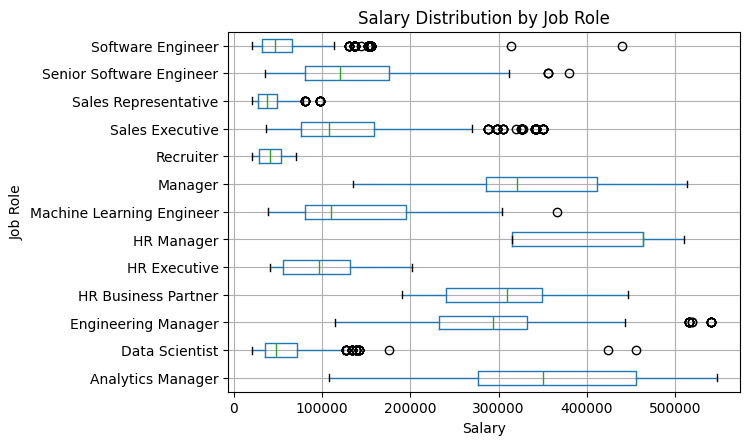

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df.boxplot(column="Salary", by="JobRole", vert=False)
plt.title("Salary Distribution by Job Role")
plt.suptitle("")
plt.xlabel("Salary")
plt.ylabel("Job Role")
plt.show()


In [54]:
df = df.drop(columns=['EducationLevel_y','EducationLevel_x','AvgSalaryForRoleTenure_x', 'AvgSalaryForRoleTenure_y'], errors='ignore')

In [55]:
print(df_Employee.shape)
print(df_performance.shape)

(1470, 27)
(4891, 21)


In [56]:
mask1 = (
    (df_Employee['EducationLevelID'] == 4) &
    (df_Employee['JobRole'].str.strip() == 'Data Scientist') &
    (df_Employee['YearsAtCompany'] == 0) &
    (df_Employee['EducationField'].str.strip() == 'Computer Science')
)

In [57]:
print(df_Employee.loc[mask1, ['EmployeeID', 'EducationLevelID', 'JobRole', 'YearsAtCompany', 'EducationField', 'Salary']])

     EmployeeID  EducationLevelID         JobRole  YearsAtCompany  \
1312  7AA0-5766                 4  Data Scientist               0   
1367  4795-4D3F                 4  Data Scientist               0   
1371  5DBA-93C9                 4  Data Scientist               0   
1406  380E-44B4                 4  Data Scientist               0   
1423  E442-5985                 4  Data Scientist               0   
1425  372C-E204                 4  Data Scientist               0   

        EducationField  Salary  
1312  Computer Science   63571  
1367  Computer Science   28544  
1371  Computer Science   21202  
1406  Computer Science   25255  
1423  Computer Science  124429  
1425  Computer Science  455643  


In [58]:
df_Employee['Salary'] = pd.to_numeric(df_Employee['Salary'], errors='coerce')
df_Employee['Salary'] = df_Employee['Salary'].astype(float)

In [59]:
#  -- '372C-E204' | Data Scientist | Education 4 | YearsAtCompany 0 | Computer Science
mask1 = (
    (df_Employee['EducationLevelID'] == 4) &
    (df_Employee['JobRole'] == 'Data Scientist') &
    (df_Employee['YearsAtCompany'] == 0) &
    (df_Employee['EducationField'] == 'Computer Science')
)

avg_salary_1 = df_Employee.loc[mask1, 'Salary'].mean()
df_Employee.loc[df_Employee['EmployeeID'] == '372C-E204', 'Salary'] = avg_salary_1


#  -- 'AFC3-E23F' | Replace salary with employee '1053-41B1'
salary_1053 = df_Employee.loc[df_Employee['EmployeeID'] == '1053-41B1', 'Salary'].values[0]
df_Employee.loc[df_Employee['EmployeeID'] == 'AFC3-E23F', 'Salary'] = salary_1053


#  -- '801E-9D0E' | Software Engineer | Education 4 | YearsAtCompany 1 | Info Systems
mask3 = (
    (df_Employee['EducationLevelID'] == 4) &
    (df_Employee['JobRole'] == 'Software Engineer') &
    (df_Employee['YearsAtCompany'] == 1) &
    (df_Employee['EducationField'] == 'Information Systems')
)

avg_salary_3 = df_Employee.loc[mask3, 'Salary'].mean()
df_Employee.loc[df_Employee['EmployeeID'] == '801E-9D0E', 'Salary'] = avg_salary_3

#  verify updates
print(df_Employee.loc[df_Employee['EmployeeID'].isin(['372C-E204', 'AFC3-E23F', '801E-9D0E']), 
             ['EmployeeID', 'Salary']])


     EmployeeID         Salary
1194  801E-9D0E  104487.714286
1226  AFC3-E23F   31014.000000
1425  372C-E204  119774.000000


In [60]:
print(df_Employee.loc[mask1, ['EmployeeID', 'EducationLevelID', 'JobRole', 'YearsAtCompany', 'EducationField', 'Salary']])

     EmployeeID  EducationLevelID         JobRole  YearsAtCompany  \
1312  7AA0-5766                 4  Data Scientist               0   
1367  4795-4D3F                 4  Data Scientist               0   
1371  5DBA-93C9                 4  Data Scientist               0   
1406  380E-44B4                 4  Data Scientist               0   
1423  E442-5985                 4  Data Scientist               0   
1425  372C-E204                 4  Data Scientist               0   

        EducationField    Salary  
1312  Computer Science   63571.0  
1367  Computer Science   28544.0  
1371  Computer Science   21202.0  
1406  Computer Science   25255.0  
1423  Computer Science  124429.0  
1425  Computer Science  119774.0  


In [61]:
print("JobRole values:", df_Employee['JobRole'].unique())
print("EducationField values:", df_Employee['EducationField'].unique())
print("EducationLevelID values:", df_Employee['EducationLevelID'].unique())
print("Column names:", df_Employee.columns.tolist())


JobRole values: <StringArray>
[          'Sales Executive',       'HR Business Partner',
       'Engineering Manager',                 'Recruiter',
            'Data Scientist', 'Machine Learning Engineer',
                   'Manager',         'Software Engineer',
  'Senior Software Engineer',      'Sales Representative',
         'Analytics Manager',              'HR Executive',
                'HR Manager']
Length: 13, dtype: string
EducationField values: <StringArray>
[          'Marketing',    'Computer Science',    'Technical Degree',
 'Information Systems',               'Other',           'Economics',
     'Human Resources',    'Business Studies']
Length: 8, dtype: string
EducationLevelID values: [5 4 3 2 1]
Column names: ['EmployeeID', 'Gender', 'Age', 'BusinessTravel', 'Department', 'DistanceFromHome (KM)', 'State', 'Ethnicity', 'EducationField', 'JobRole', 'MaritalStatus', 'Salary', 'StockOptionLevel', 'OverTime', 'HireDate', 'Attrition', 'YearsAtCompany', 'YearsInMostRecent

In [62]:
# حساب عدد الموظفين في كل JobRole داخل كل Department
dept_job_count = (
    df_Employee.groupby(['Department', 'JobRole'])
    .size()
    .reset_index(name='EmployeeCount')
    .sort_values(['Department', 'EmployeeCount'], ascending=[True, False])
)

print(dept_job_count)


         Department                    JobRole  EmployeeCount
1   Human Resources               HR Executive             28
3   Human Resources                  Recruiter             24
0   Human Resources        HR Business Partner              7
2   Human Resources                 HR Manager              4
5             Sales            Sales Executive            326
6             Sales       Sales Representative             83
4             Sales                    Manager             37
13       Technology          Software Engineer            294
8        Technology             Data Scientist            261
10       Technology  Machine Learning Engineer            146
12       Technology   Senior Software Engineer            132
9        Technology        Engineering Manager             75
7        Technology          Analytics Manager             52
11       Technology            Sales Executive              1


In [63]:
# استخراج الـ IDs للموظفين اللي في Technology و Sales Executive
ids = df_Employee.loc[
    (df_Employee['Department'] == 'Technology') &
    (df_Employee['JobRole'] == 'Sales Executive'),
    'EmployeeID'
]

print(" Employee IDs:")
print(ids.tolist())

 Employee IDs:
['9758-DE2F']


In [64]:
df_Employee.loc[df_Employee['EmployeeID'] == '9758-DE2F', 'Department'] = 'Sales'

# Optional check like your SQL SELECT
df_Employee.loc[df_Employee['EmployeeID'] == '9758-DE2F']


,EmployeeID,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,EducationField,JobRole,...,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationLevelID,EducationLevel,CurrentDate,FullName,AgeGroup,TenureCompany,SalaryLevel
1187,9758-DE2F,Female,28,Some Travel,Sales,15,CA,White,Other,Sales Executive,...,1,1,0,4,Masters,2022-01-26,Modestine Yeowell,18-29,0-2,High


In [65]:
# save files
df_Employee.to_csv("Employee_Cleaned1.csv", index=False)
df_performance.to_csv("Performance_Cleaned1.csv", index=False)